https://drive.google.com/file/d/1jzNjpMXW9hz9Uh0K8h83a1t4dyC0E2Rv/view?usp=drive_link

<center> <b>Machine Learning - SBU FALL 2024</b></center> 

In [38]:
student_number = '400243082'
Name = 'Pouria'
Last_Name = 'Yazdani'

# Imported Libraries

In [39]:
import torch
import torch.nn as nn               # For building neural network layers
import torch.optim as optim         # For optimizers (SGD, Adam, etc.)
import torch.nn.functional as F     # For activation functions and other operations
from torchvision import datasets, transforms  # For MNIST dataset and data preprocessing if its needed
from torch.utils.data import DataLoader, Dataset       # For batching and shuffling data

# Additional libraries for visualization and analysis
import matplotlib.pyplot as plt     # For plotting graphs and visualizations
import numpy as np                  # For numerical operations
import seaborn as sns               # For plotting the confusion matrix heatmap
from sklearn.metrics import confusion_matrix  # For computing the confusion matrix

# Build a Model for the MNIST Dataset

In this Notebook, your goal is to build a machine learning model that achieves an accuracy of **98% or higher** on the MNIST dataset. The MNIST dataset contains images of handwritten digits (0-9), and it’s a popular benchmark for evaluating classification models. To achieve this accuracy threshold, you’ll need to carefully design, train, and evaluate your model.

## Objective

Using only the provided libraries, you will:
1. **Load and preprocess** the MNIST data.
2. **Build** a neural network model suitable for image classification.
3. **Train** the model on the training data, monitoring accuracy and adjusting parameters as needed.
4. **Evaluate** the model on the test data to ensure it meets the required accuracy threshold.

Each cell in this section will guide you through these steps, with descriptions explaining the purpose of each step and what you need to do. Follow the instructions carefully, and use your understanding of neural networks to achieve the best possible performance on the MNIST dataset.

## Step 1: Loading and Preprocessing the MNIST Dataset

In this cell, you will:
1. **Load the MNIST dataset**: This dataset consists of 28x28 grayscale images of handwritten digits (0–9). Each image is represented as a 28x28 array of pixel values, and each label corresponds to the digit in the image.
   
2. **Define key variables**:
   - `num_classes`: The number of unique classes in the dataset (0–9).
   - `input_shape`: The shape of each image, which will help in defining the model's input layer.
   - `num_features`: The total number of pixels in each image, useful if you need to flatten the images into a 1D vector for the model.

3. **Normalize the pixel values**: The pixel values are divided by 255 to rescale them from their original range of 0–255 to a range of 0–1. This normalization step helps the model converge faster and improves performance.

4. **One-hot encode the labels**: Convert the labels into a one-hot encoded format. Instead of representing the labels as single integers (e.g., `3` for the digit 3), one-hot encoding represents each label as a binary vector (e.g., `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]` for the digit 3). This format is commonly used for multi-class classification problems and is required for training neural networks effectively.

By the end of this cell, your data will be ready for building and training the model.

In [40]:
transform = transforms.Compose([
    transforms.ToTensor(), # automatically transforms to [0,1]
])

In [41]:

class MNISTDataset(Dataset):
    def __init__(self, train=True, transform=None):
        self.dataset = datasets.MNIST(
            root='data',
            train=train,
            transform=transform,
            download=True
        )
        self.num_classes = len(set(self.dataset.targets.numpy()))


    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        return image, label

In [42]:
train_dataset = MNISTDataset(train=True, transform=transform)
test_dataset = MNISTDataset(train=False, transform=transform)

In [43]:
print(len(train_dataset))
print(len(test_dataset))
print(train_dataset[17])

60000
10000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.

In [44]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=0)

In [45]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [46]:
num_classes = train_dataset.num_classes
input_shape = train_dataset[0][0].shape
num_features = input_shape[0] * input_shape[1] * input_shape[2]

print(f'num classes: {num_classes}')
print(f'input shape: {input_shape}')
print(f'num_features: {num_features}')

num classes: 10
input shape: torch.Size([1, 28, 28])
num_features: 784


## Step 2: Building and Optimizing Your Model for MNIST

Your goal in this cell is to build a neural network model that achieves an accuracy of **98% or higher** on the MNIST dataset. To achieve this, you will need to:
1. **Define the model architecture**: You can experiment with the number of layers, units in each layer, and other architectural details to optimize your model’s performance.
2. **Choose an optimizer**: Test different optimizers (SGD, Adagrad, RMSprop, Adam) and fine-tune their hyperparameters (such as learning rate, momentum, etc.).
3. **Search for optimal hyperparameters**: You can use hyperparameter tuning methods such as **Hyperband**, **Random Search**, or **Bayesian Optimization** to find the best hyperparameter values efficiently.

### Available Tuning Options

- **Hyperband**: Efficiently finds the best hyperparameters by exploring a wide range and narrowing down based on performance.
- **Random Search**: Tries a random combination of hyperparameters within defined ranges.
- **Bayesian Optimization**: Uses a probabilistic approach to find the best parameters based on past evaluations.

### Final Task

Once you’ve achieved a model with over **98% accuracy** on the MNIST test set:
1. **Print the optimal hyperparameters** for your best-performing model.
2. **Build and compile the model** using these optimal parameters.
3. **Display the model summary** at the end of the cell.

By following this approach, you will gain insights into how different optimizers and model configurations impact performance, ultimately helping you build an effective and efficient model for the MNIST dataset.


### if you achieve the threshold before testing all the items above you must continue and interpert the result and the change effect!

## Step 3: Training, Evaluating, and Saving Your Model

In this part, you will:
1. **Train the Model**: Train your model on the MNIST training data for a specified number of epochs. The `fit` function will show the training and validation accuracy/loss at each epoch, allowing you to monitor the model’s progress.
   
2. **Make Predictions**: Once training is complete, generate predictions on the test data. While not required for accuracy calculation, this can be useful if you want to further analyze the model’s predictions.

3. **Evaluate the Model**: Use the `evaluate` function to calculate the model's loss and accuracy on the test set. This will give you an objective measure of the model’s performance. Remember, the goal is to achieve **98% or higher** accuracy.

4. **Save the Model**: After achieving satisfactory accuracy, save your model to disk for later use. This allows you to load the trained model in the future without retraining.

### Important Notes:
- **Training Parameters**: You can adjust the number of epochs or batch size in the `fit` function if needed to reach the required accuracy.
- **Model Storage**: The saved model file (`mnist_model.keras`) will store the entire model structure and weights, enabling you to load and use it later without needing to rebuild or retrain.

By completing these steps, you will have a fully trained and saved model capable of achieving high accuracy on the MNIST dataset.

## Steps 2 and 3 combined

### Model Definition

In [47]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation, l2_penalty):
        super(FeedForwardNN, self).__init__()
        layers = []
        
        # Input layer
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            if activation == "ReLU":
                layers.append(nn.ReLU())
            elif activation == "SoftReLU":
                layers.append(nn.Softplus())
            prev_size = hidden_size
        
        # Output layer -> softmax is not applied here -> output is logits
        layers.append(nn.Linear(prev_size, output_size))
        self.network = nn.Sequential(*layers)
        self.l2_penalty = l2_penalty

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.network(x)


### Training Loop

In [48]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

### Evaluation

In [49]:
from sklearn.metrics import accuracy_score

def evaluate(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return accuracy_score(all_labels, all_preds)


### Parameter Search Space

In [56]:
hidden_layers_options = [[128], [256, 128], [512, 256, 128]]
activation_options = ["ReLU", "SoftReLU"]
l2_penalty_options = [1e-4, 1e-3, 1e-2]
optimizer_options = ["SGD", "Adam", "Nesterov"]
learning_rate_options = [1e-2, 1e-3, 1e-4]
momentum_options = [0.8, 0.9, 0.95]
beta1_options = [0.9, 0.95] # first moment
beta2_options = [0.999, 0.98] # second moment
batch_size_options = [64, 128, 256]


### Random Search

In [55]:
import os
import random
import torch

# Ensure the folder "random" exists
os.makedirs("random", exist_ok=True)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 28 * 28
output_size = 10
num_trials = 10  # Number of random trials
batch_size = 64
num_epochs = 20
early_stopping_patience = 5  # Stop training if no improvement for this many epochs

best_model = None
best_accuracy = 0
best_hyperparams = {}

for trial in range(num_trials):
    # Randomly sample hyperparameters
    hidden_layers = random.choice(hidden_layers_options)
    activation = random.choice(activation_options)
    l2_penalty = random.choice(l2_penalty_options)
    optimizer_type = random.choice(optimizer_options)
    learning_rate = random.choice(learning_rate_options)
    
    # Special hyperparameters for optimizers
    if optimizer_type == "Nesterov":
        momentum = random.choice(momentum_options)
    elif optimizer_type == "Adam":
        beta1 = random.choice(beta1_options)
        beta2 = random.choice(beta2_options)
    
    # Initialize model
    model = FeedForwardNN(input_size, hidden_layers, output_size, activation, l2_penalty).to(device)
    
    # Loss function
    criterion = nn.CrossEntropyLoss() # softmax is implicitly applied here
    
    # Optimizer
    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_penalty)
    elif optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=l2_penalty)
    elif optimizer_type == "Nesterov":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True, weight_decay=l2_penalty)
    
    # Train and evaluate
    print(f"Trial {trial + 1}/{num_trials} with hyperparameters: ")
    print(f"Hidden Layers: {hidden_layers}, Activation: {activation}, L2 Penalty: {l2_penalty}")
    print(f"Optimizer: {optimizer_type}, Learning Rate: {learning_rate}")
    if optimizer_type == "Nesterov":
        print(f"Momentum: {momentum}")
    elif optimizer_type == "Adam":
        print(f"Beta1: {beta1}, Beta2: {beta2}")
    
    trial_best_model = None
    trial_best_accuracy = 0
    epochs_no_improve = 0  # Track epochs without improvement

    for epoch in range(num_epochs): 
        train_loss = train(model, train_loader, optimizer, criterion, device)
        accuracy = evaluate(model, test_loader, device)
        print(f"Epoch {epoch + 1}: Loss = {train_loss:.3f}, Accuracy = {accuracy:.3f}")
        
        if accuracy > trial_best_accuracy:
            trial_best_accuracy = accuracy
            trial_best_model = model.state_dict()
            epochs_no_improve = 0  # Reset counter if improvement is found
        else:
            epochs_no_improve += 1
        
        # Check early stopping condition
        if epochs_no_improve >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

    # Save the best model for this trial in the "random" folder
    torch.save(trial_best_model, f"random/best_model_trial_{trial + 1}.pth")
    
    # Update global best model if accuracy improves
    if trial_best_accuracy > best_accuracy:
        best_accuracy = trial_best_accuracy
        best_model = model
        best_hyperparams = {
            "hidden_layers": hidden_layers,
            "activation": activation,
            "l2_penalty": l2_penalty,
            "optimizer": optimizer_type,
            "learning_rate": learning_rate
        }
        if optimizer_type == "Nesterov":
            best_hyperparams["momentum"] = momentum
        elif optimizer_type == "Adam":
            best_hyperparams["beta1"] = beta1
            best_hyperparams["beta2"] = beta2

print("Best Hyperparameters:")
print(best_hyperparams)
print(f"Best Accuracy: {best_accuracy:.3f}")


Trial 1/10 with hyperparameters: 
Hidden Layers: [512, 256, 128], Activation: SoftReLU, L2 Penalty: 0.0001
Optimizer: Nesterov, Learning Rate: 0.0001
Momentum: 0.8
Epoch 1: Loss = 2.316, Accuracy = 0.114
Epoch 2: Loss = 2.301, Accuracy = 0.114
Epoch 3: Loss = 2.300, Accuracy = 0.114
Epoch 4: Loss = 2.299, Accuracy = 0.114
Epoch 5: Loss = 2.299, Accuracy = 0.114
Epoch 6: Loss = 2.298, Accuracy = 0.114
Early stopping triggered at epoch 6
Trial 2/10 with hyperparameters: 
Hidden Layers: [512, 256, 128], Activation: SoftReLU, L2 Penalty: 0.001
Optimizer: Adam, Learning Rate: 0.01
Beta1: 0.95, Beta2: 0.999
Epoch 1: Loss = 0.595, Accuracy = 0.917
Epoch 2: Loss = 0.247, Accuracy = 0.926
Epoch 3: Loss = 0.234, Accuracy = 0.934
Epoch 4: Loss = 0.217, Accuracy = 0.926
Epoch 5: Loss = 0.214, Accuracy = 0.924
Epoch 6: Loss = 0.212, Accuracy = 0.944
Epoch 7: Loss = 0.209, Accuracy = 0.941
Epoch 8: Loss = 0.208, Accuracy = 0.944
Epoch 9: Loss = 0.206, Accuracy = 0.921
Epoch 10: Loss = 0.206, Accurac

In [60]:
model = FeedForwardNN(input_size=28*28, hidden_sizes=[128], output_size=10, activation='SoftReLU', l2_penalty=0.0001)
model.to(device)

# Step 2: Load the saved state_dict
model.load_state_dict(torch.load("random/best_model_trial_3.pth"))

# Step 3: Switch to evaluation mode
accuracy = evaluate(model, test_loader, device)
print(f'{accuracy:.2f}')

0.98


### Hyperband Searach

In [76]:
# Single-cell implementation for Optuna Hyperband Search with Batch Size
import optuna
from optuna.pruners import HyperbandPruner
from torch.utils.data import DataLoader
import os
import torch

# Ensure folder exists to save models
os.makedirs("hyperband_models", exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 28 * 28
output_size = 10
num_epochs = 10  # Adjust as needed

# Objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    hidden_layers_str = trial.suggest_categorical(
        "hidden_layers", ["128", "256,128", "512,256,128"]
    )
    hidden_layers = tuple(map(int, hidden_layers_str.split(',')))
    activation = trial.suggest_categorical("activation", ["ReLU", "SoftReLU"])
    l2_penalty = trial.suggest_float("l2_penalty", 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    optimizer_type = trial.suggest_categorical("optimizer", ["SGD", "Adam", "Nesterov"])

    # Additional optimizer-specific parameters
    if optimizer_type == "Nesterov":
        momentum = trial.suggest_float("momentum", 0.8, 0.99)
    elif optimizer_type == "Adam":
        beta1 = trial.suggest_float("beta1", 0.8, 0.99)
        beta2 = trial.suggest_float("beta2", 0.9, 0.999)

    # Define data loaders with the sampled batch size
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=0
    )
    print(f"\n[Trial {trial.number}] Starting with hyperparameters: {trial.params}")


    # Define the model
    model = FeedForwardNN(input_size, hidden_layers, output_size, activation, l2_penalty).to(device)

    # Loss function
    criterion = nn.CrossEntropyLoss()

    # Optimizer setup
    if optimizer_type == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_penalty)
    elif optimizer_type == "Adam":
        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=learning_rate,
            betas=(beta1, beta2),
            weight_decay=l2_penalty,
        )
    elif optimizer_type == "Nesterov":
        optimizer = torch.optim.SGD(
            model.parameters(),
            lr=learning_rate,
            momentum=momentum,
            nesterov=True,
            weight_decay=l2_penalty,
        )

    # Training and evaluation
    best_accuracy = 0
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, criterion, device)
        accuracy = evaluate(model, test_loader, device)
        print(f"[Trial {trial.number}] Epoch {epoch + 1}/{num_epochs} - Loss: {train_loss:.3f}, Accuracy: {accuracy:.3f}")
        # Save the best model of the current trial
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(
                {
                    "model_state_dict": model.state_dict(),
                    "trial_params": trial.params,
                },
                f"hyperband_models/best_model_trial_{trial.number}.pth",
            )
        # Early stopping if necessary
        trial.report(best_accuracy, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_accuracy

# Create Optuna study
optuna.logging.set_verbosity(optuna.logging.INFO)  # Enable progress logs
study = optuna.create_study(
    direction="maximize",
    pruner=HyperbandPruner(min_resource=1, max_resource=num_epochs),
)
optuna.logging.set_verbosity(optuna.logging.INFO)
study.optimize(objective, n_trials=10)

# Save the best trial's model and parameters
best_trial = study.best_trial
best_model_path = f"hyperband_models/best_model_trial_{best_trial.number}.pth"
torch.save(
    {
        "model_state_dict": torch.load(best_model_path)["model_state_dict"],
        "best_params": best_trial.params,
    },
    "hyperband_models/best_model_overall.pth",
)

print(f"Best trial number: {best_trial.number}")
print(f"Best accuracy: {best_trial.value:.3f}")
print("Best parameters:")
print(best_trial.params)


[I 2024-12-17 01:02:47,782] A new study created in memory with name: no-name-7840e96a-3665-46c8-a382-98811342b7c5



[Trial 0] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.00043486787507593605, 'learning_rate': 0.005378765766010409, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8487101483839954, 'beta2': 0.9160898422377741}
[Trial 0] Epoch 1/10 - Loss: 0.370, Accuracy: 0.931
[Trial 0] Epoch 2/10 - Loss: 0.178, Accuracy: 0.950
[Trial 0] Epoch 3/10 - Loss: 0.157, Accuracy: 0.939
[Trial 0] Epoch 4/10 - Loss: 0.147, Accuracy: 0.961
[Trial 0] Epoch 5/10 - Loss: 0.139, Accuracy: 0.965
[Trial 0] Epoch 6/10 - Loss: 0.136, Accuracy: 0.959
[Trial 0] Epoch 7/10 - Loss: 0.133, Accuracy: 0.951
[Trial 0] Epoch 8/10 - Loss: 0.133, Accuracy: 0.964
[Trial 0] Epoch 9/10 - Loss: 0.130, Accuracy: 0.963


[I 2024-12-17 01:05:21,457] Trial 0 finished with value: 0.965 and parameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.00043486787507593605, 'learning_rate': 0.005378765766010409, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8487101483839954, 'beta2': 0.9160898422377741}. Best is trial 0 with value: 0.965.


[Trial 0] Epoch 10/10 - Loss: 0.128, Accuracy: 0.964

[Trial 1] Starting with hyperparameters: {'hidden_layers': '256,128', 'activation': 'ReLU', 'l2_penalty': 0.004853027050206932, 'learning_rate': 0.002623468246057754, 'batch_size': 64, 'optimizer': 'Nesterov', 'momentum': 0.8206381930915831}
[Trial 1] Epoch 1/10 - Loss: 1.408, Accuracy: 0.852


[I 2024-12-17 01:05:45,777] Trial 1 pruned. 


[Trial 1] Epoch 2/10 - Loss: 0.456, Accuracy: 0.895

[Trial 2] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.7223519343745444e-05, 'learning_rate': 0.0023480615144601947, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.955891320442451, 'beta2': 0.9973131346221021}
[Trial 2] Epoch 1/10 - Loss: 0.311, Accuracy: 0.958
[Trial 2] Epoch 2/10 - Loss: 0.117, Accuracy: 0.969
[Trial 2] Epoch 3/10 - Loss: 0.083, Accuracy: 0.973
[Trial 2] Epoch 4/10 - Loss: 0.067, Accuracy: 0.976
[Trial 2] Epoch 5/10 - Loss: 0.059, Accuracy: 0.980
[Trial 2] Epoch 6/10 - Loss: 0.050, Accuracy: 0.975
[Trial 2] Epoch 7/10 - Loss: 0.044, Accuracy: 0.978
[Trial 2] Epoch 8/10 - Loss: 0.039, Accuracy: 0.978
[Trial 2] Epoch 9/10 - Loss: 0.039, Accuracy: 0.975


[I 2024-12-17 01:08:19,477] Trial 2 finished with value: 0.9797 and parameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.7223519343745444e-05, 'learning_rate': 0.0023480615144601947, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.955891320442451, 'beta2': 0.9973131346221021}. Best is trial 2 with value: 0.9797.


[Trial 2] Epoch 10/10 - Loss: 0.035, Accuracy: 0.978

[Trial 3] Starting with hyperparameters: {'hidden_layers': '128', 'activation': 'SoftReLU', 'l2_penalty': 1.8892528443002618e-05, 'learning_rate': 0.0002514325093548061, 'batch_size': 256, 'optimizer': 'SGD'}
[Trial 3] Epoch 1/10 - Loss: 2.355, Accuracy: 0.095


[I 2024-12-17 01:08:38,001] Trial 3 pruned. 


[Trial 3] Epoch 2/10 - Loss: 2.321, Accuracy: 0.146

[Trial 4] Starting with hyperparameters: {'hidden_layers': '256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.0016834400300539318, 'learning_rate': 0.0008767809674118463, 'batch_size': 64, 'optimizer': 'Nesterov', 'momentum': 0.8338449767629854}
[Trial 4] Epoch 1/10 - Loss: 2.269, Accuracy: 0.398


[I 2024-12-17 01:09:02,208] Trial 4 pruned. 


[Trial 4] Epoch 2/10 - Loss: 2.103, Accuracy: 0.492

[Trial 5] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.201468758895439e-05, 'learning_rate': 0.006681191625018689, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8170682023084801, 'beta2': 0.9812884582929401}
[Trial 5] Epoch 1/10 - Loss: 0.322, Accuracy: 0.961
[Trial 5] Epoch 2/10 - Loss: 0.129, Accuracy: 0.966
[Trial 5] Epoch 3/10 - Loss: 0.104, Accuracy: 0.969
[Trial 5] Epoch 4/10 - Loss: 0.094, Accuracy: 0.973
[Trial 5] Epoch 5/10 - Loss: 0.088, Accuracy: 0.971
[Trial 5] Epoch 6/10 - Loss: 0.083, Accuracy: 0.971
[Trial 5] Epoch 7/10 - Loss: 0.083, Accuracy: 0.969
[Trial 5] Epoch 8/10 - Loss: 0.078, Accuracy: 0.968
[Trial 5] Epoch 9/10 - Loss: 0.080, Accuracy: 0.970


[I 2024-12-17 01:11:34,114] Trial 5 finished with value: 0.9725 and parameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.201468758895439e-05, 'learning_rate': 0.006681191625018689, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8170682023084801, 'beta2': 0.9812884582929401}. Best is trial 2 with value: 0.9797.


[Trial 5] Epoch 10/10 - Loss: 0.078, Accuracy: 0.971

[Trial 6] Starting with hyperparameters: {'hidden_layers': '128', 'activation': 'SoftReLU', 'l2_penalty': 0.00015075077368980467, 'learning_rate': 0.0031616000622824566, 'batch_size': 256, 'optimizer': 'Adam', 'beta1': 0.8140712862275107, 'beta2': 0.9807204607832029}
[Trial 6] Epoch 1/10 - Loss: 0.400, Accuracy: 0.934
[Trial 6] Epoch 2/10 - Loss: 0.191, Accuracy: 0.957
[Trial 6] Epoch 3/10 - Loss: 0.136, Accuracy: 0.962


[I 2024-12-17 01:12:12,065] Trial 6 pruned. 


[Trial 6] Epoch 4/10 - Loss: 0.106, Accuracy: 0.971

[Trial 7] Starting with hyperparameters: {'hidden_layers': '128', 'activation': 'ReLU', 'l2_penalty': 0.0004699877078680514, 'learning_rate': 0.0001424730660861259, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8792327573389139, 'beta2': 0.998166183264181}
[Trial 7] Epoch 1/10 - Loss: 0.744, Accuracy: 0.906
[Trial 7] Epoch 2/10 - Loss: 0.332, Accuracy: 0.919
[Trial 7] Epoch 3/10 - Loss: 0.283, Accuracy: 0.928


[I 2024-12-17 01:13:01,015] Trial 7 pruned. 


[Trial 7] Epoch 4/10 - Loss: 0.252, Accuracy: 0.933

[Trial 8] Starting with hyperparameters: {'hidden_layers': '256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.003544223387028624, 'learning_rate': 0.0026219356535575966, 'batch_size': 128, 'optimizer': 'SGD'}
[Trial 8] Epoch 1/10 - Loss: 2.296, Accuracy: 0.114


[I 2024-12-17 01:13:20,756] Trial 8 pruned. 


[Trial 8] Epoch 2/10 - Loss: 2.279, Accuracy: 0.166

[Trial 9] Starting with hyperparameters: {'hidden_layers': '256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.005900629061852579, 'learning_rate': 0.00015963963050695542, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.8436596288625745, 'beta2': 0.9210842630532698}
[Trial 9] Epoch 1/10 - Loss: 0.847, Accuracy: 0.901


[I 2024-12-17 01:13:45,178] Trial 9 pruned. 


[Trial 9] Epoch 2/10 - Loss: 0.394, Accuracy: 0.900
Best trial number: 2
Best accuracy: 0.980
Best parameters:
{'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.7223519343745444e-05, 'learning_rate': 0.0023480615144601947, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.955891320442451, 'beta2': 0.9973131346221021}


### Bayesian Search

In [79]:
# Single-cell implementation for Optuna Bayesian Optimization with Batch Size
import optuna
from torch.utils.data import DataLoader
import os
import torch

# Ensure folder exists to save models
os.makedirs("bayesian", exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 28 * 28
output_size = 10
num_epochs = 10  # Adjust as needed

# Objective function for Optuna
def objective(trial):
    # Hyperparameter search space
    hidden_layers_str = trial.suggest_categorical(
        "hidden_layers", ["128", "256,128", "512,256,128"]
    )
    hidden_layers = tuple(map(int, hidden_layers_str.split(',')))
    activation = trial.suggest_categorical("activation", ["ReLU", "SoftReLU"])
    l2_penalty = trial.suggest_float("l2_penalty", 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    optimizer_type = trial.suggest_categorical("optimizer", ["SGD", "Adam", "Nesterov"])

    # Additional optimizer-specific parameters
    if optimizer_type == "Nesterov":
        momentum = trial.suggest_float("momentum", 0.8, 0.99)
    elif optimizer_type == "Adam":
        beta1 = trial.suggest_float("beta1", 0.8, 0.99)
        beta2 = trial.suggest_float("beta2", 0.9, 0.999)

    print(f"\n[Trial {trial.number}] Starting with hyperparameters: {trial.params}")

    # Define data loaders with the sampled batch size
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=0
    )

    # Define the model
    model = FeedForwardNN(input_size, hidden_layers, output_size, activation, l2_penalty).to(device)
    criterion = nn.CrossEntropyLoss()

    # Optimizer setup
    if optimizer_type == "SGD":
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_penalty)
    elif optimizer_type == "Adam":
        optimizer = torch.optim.Adam(
            model.parameters(),
            lr=learning_rate,
            betas=(beta1, beta2),
            weight_decay=l2_penalty,
        )
    elif optimizer_type == "Nesterov":
        optimizer = torch.optim.SGD(
            model.parameters(),
            lr=learning_rate,
            momentum=momentum,
            nesterov=True,
            weight_decay=l2_penalty,
        )

    # Training and evaluation
    best_accuracy = 0
    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, criterion, device)
        accuracy = evaluate(model, test_loader, device)

        print(f"[Trial {trial.number}] Epoch {epoch + 1}/{num_epochs} - Loss: {train_loss:.3f}, Accuracy: {accuracy:.3f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(
                {
                    "model_state_dict": model.state_dict(),
                    "trial_params": trial.params,
                },
                f"bayesian/best_model_trial_{trial.number}.pth",
            )

        # Early stopping if necessary
        trial.report(best_accuracy, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_accuracy

# Create Optuna study for Bayesian Optimization
optuna.logging.set_verbosity(optuna.logging.INFO)  # Enable progress logs
study = optuna.create_study(direction="maximize")  # Bayesian optimization is the default strategy
study.optimize(objective, n_trials=10)

# Save the best trial's model and parameters
best_trial = study.best_trial
best_model_path = f"bayesian/best_model_trial_{best_trial.number}.pth"
torch.save(
    {
        "model_state_dict": torch.load(best_model_path)["model_state_dict"],
        "best_params": best_trial.params,
    },
    "bayesian/best_model_overall.pth",
)

print(f"Best trial number: {best_trial.number}")
print(f"Best accuracy: {best_trial.value:.3f}")
print("Best parameters:")
print(best_trial.params)


[I 2024-12-17 01:39:09,879] A new study created in memory with name: no-name-1c06a767-c139-427b-95a3-d4bc7a85823c



[Trial 0] Starting with hyperparameters: {'hidden_layers': '128', 'activation': 'SoftReLU', 'l2_penalty': 2.3601999806301013e-05, 'learning_rate': 0.003956366108873872, 'batch_size': 128, 'optimizer': 'Adam', 'beta1': 0.8287917974530906, 'beta2': 0.9841582580610025}
[Trial 0] Epoch 1/10 - Loss: 0.303, Accuracy: 0.951
[Trial 0] Epoch 2/10 - Loss: 0.123, Accuracy: 0.972
[Trial 0] Epoch 3/10 - Loss: 0.081, Accuracy: 0.973
[Trial 0] Epoch 4/10 - Loss: 0.063, Accuracy: 0.979
[Trial 0] Epoch 5/10 - Loss: 0.051, Accuracy: 0.979
[Trial 0] Epoch 6/10 - Loss: 0.041, Accuracy: 0.977
[Trial 0] Epoch 7/10 - Loss: 0.037, Accuracy: 0.978
[Trial 0] Epoch 8/10 - Loss: 0.032, Accuracy: 0.979
[Trial 0] Epoch 9/10 - Loss: 0.029, Accuracy: 0.978


[I 2024-12-17 01:40:48,976] Trial 0 finished with value: 0.979 and parameters: {'hidden_layers': '128', 'activation': 'SoftReLU', 'l2_penalty': 2.3601999806301013e-05, 'learning_rate': 0.003956366108873872, 'batch_size': 128, 'optimizer': 'Adam', 'beta1': 0.8287917974530906, 'beta2': 0.9841582580610025}. Best is trial 0 with value: 0.979.


[Trial 0] Epoch 10/10 - Loss: 0.028, Accuracy: 0.978

[Trial 1] Starting with hyperparameters: {'hidden_layers': '256,128', 'activation': 'ReLU', 'l2_penalty': 0.0008623770314714271, 'learning_rate': 0.0002161588261902346, 'batch_size': 256, 'optimizer': 'Adam', 'beta1': 0.9125919354683123, 'beta2': 0.921182722033879}
[Trial 1] Epoch 1/10 - Loss: 0.974, Accuracy: 0.902
[Trial 1] Epoch 2/10 - Loss: 0.327, Accuracy: 0.920
[Trial 1] Epoch 3/10 - Loss: 0.269, Accuracy: 0.931
[Trial 1] Epoch 4/10 - Loss: 0.229, Accuracy: 0.941
[Trial 1] Epoch 5/10 - Loss: 0.200, Accuracy: 0.948
[Trial 1] Epoch 6/10 - Loss: 0.176, Accuracy: 0.953
[Trial 1] Epoch 7/10 - Loss: 0.158, Accuracy: 0.956
[Trial 1] Epoch 8/10 - Loss: 0.143, Accuracy: 0.958
[Trial 1] Epoch 9/10 - Loss: 0.130, Accuracy: 0.963


[I 2024-12-17 01:42:19,609] Trial 1 finished with value: 0.9649 and parameters: {'hidden_layers': '256,128', 'activation': 'ReLU', 'l2_penalty': 0.0008623770314714271, 'learning_rate': 0.0002161588261902346, 'batch_size': 256, 'optimizer': 'Adam', 'beta1': 0.9125919354683123, 'beta2': 0.921182722033879}. Best is trial 0 with value: 0.979.


[Trial 1] Epoch 10/10 - Loss: 0.120, Accuracy: 0.965

[Trial 2] Starting with hyperparameters: {'hidden_layers': '128', 'activation': 'ReLU', 'l2_penalty': 0.00016360431310007722, 'learning_rate': 0.006889535682037065, 'batch_size': 128, 'optimizer': 'Nesterov', 'momentum': 0.8744037395457188}
[Trial 2] Epoch 1/10 - Loss: 0.782, Accuracy: 0.902
[Trial 2] Epoch 2/10 - Loss: 0.345, Accuracy: 0.916
[Trial 2] Epoch 3/10 - Loss: 0.296, Accuracy: 0.925
[Trial 2] Epoch 4/10 - Loss: 0.265, Accuracy: 0.930
[Trial 2] Epoch 5/10 - Loss: 0.240, Accuracy: 0.938
[Trial 2] Epoch 6/10 - Loss: 0.219, Accuracy: 0.942
[Trial 2] Epoch 7/10 - Loss: 0.201, Accuracy: 0.945
[Trial 2] Epoch 8/10 - Loss: 0.186, Accuracy: 0.949
[Trial 2] Epoch 9/10 - Loss: 0.173, Accuracy: 0.953


[I 2024-12-17 01:43:54,565] Trial 2 finished with value: 0.9542 and parameters: {'hidden_layers': '128', 'activation': 'ReLU', 'l2_penalty': 0.00016360431310007722, 'learning_rate': 0.006889535682037065, 'batch_size': 128, 'optimizer': 'Nesterov', 'momentum': 0.8744037395457188}. Best is trial 0 with value: 0.979.


[Trial 2] Epoch 10/10 - Loss: 0.161, Accuracy: 0.954

[Trial 3] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.00022111462227589779, 'learning_rate': 0.006556398582018245, 'batch_size': 64, 'optimizer': 'SGD'}
[Trial 3] Epoch 1/10 - Loss: 2.299, Accuracy: 0.198
[Trial 3] Epoch 2/10 - Loss: 2.286, Accuracy: 0.103
[Trial 3] Epoch 3/10 - Loss: 2.250, Accuracy: 0.246
[Trial 3] Epoch 4/10 - Loss: 1.840, Accuracy: 0.562
[Trial 3] Epoch 5/10 - Loss: 1.034, Accuracy: 0.682
[Trial 3] Epoch 6/10 - Loss: 0.711, Accuracy: 0.794
[Trial 3] Epoch 7/10 - Loss: 0.571, Accuracy: 0.826
[Trial 3] Epoch 8/10 - Loss: 0.482, Accuracy: 0.875
[Trial 3] Epoch 9/10 - Loss: 0.433, Accuracy: 0.872


[I 2024-12-17 01:45:57,026] Trial 3 finished with value: 0.8825 and parameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.00022111462227589779, 'learning_rate': 0.006556398582018245, 'batch_size': 64, 'optimizer': 'SGD'}. Best is trial 0 with value: 0.979.


[Trial 3] Epoch 10/10 - Loss: 0.407, Accuracy: 0.882

[Trial 4] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'ReLU', 'l2_penalty': 0.0033595011450796414, 'learning_rate': 0.0001675461714870717, 'batch_size': 64, 'optimizer': 'Nesterov', 'momentum': 0.8055710506789002}
[Trial 4] Epoch 1/10 - Loss: 2.302, Accuracy: 0.119
[Trial 4] Epoch 2/10 - Loss: 2.296, Accuracy: 0.145
[Trial 4] Epoch 3/10 - Loss: 2.289, Accuracy: 0.189
[Trial 4] Epoch 4/10 - Loss: 2.281, Accuracy: 0.251
[Trial 4] Epoch 5/10 - Loss: 2.271, Accuracy: 0.342
[Trial 4] Epoch 6/10 - Loss: 2.257, Accuracy: 0.399
[Trial 4] Epoch 7/10 - Loss: 2.239, Accuracy: 0.437
[Trial 4] Epoch 8/10 - Loss: 2.214, Accuracy: 0.455
[Trial 4] Epoch 9/10 - Loss: 2.175, Accuracy: 0.461


[I 2024-12-17 01:48:17,715] Trial 4 finished with value: 0.4659 and parameters: {'hidden_layers': '512,256,128', 'activation': 'ReLU', 'l2_penalty': 0.0033595011450796414, 'learning_rate': 0.0001675461714870717, 'batch_size': 64, 'optimizer': 'Nesterov', 'momentum': 0.8055710506789002}. Best is trial 0 with value: 0.979.


[Trial 4] Epoch 10/10 - Loss: 2.116, Accuracy: 0.466

[Trial 5] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'ReLU', 'l2_penalty': 0.00012408273796547448, 'learning_rate': 0.0001410872032557891, 'batch_size': 256, 'optimizer': 'SGD'}


[I 2024-12-17 01:48:27,967] Trial 5 pruned. 


[Trial 5] Epoch 1/10 - Loss: 2.302, Accuracy: 0.071

[Trial 6] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 1.1641423905582434e-05, 'learning_rate': 0.00237438286153223, 'batch_size': 64, 'optimizer': 'SGD'}


[I 2024-12-17 01:48:41,174] Trial 6 pruned. 


[Trial 6] Epoch 1/10 - Loss: 2.302, Accuracy: 0.114

[Trial 7] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'ReLU', 'l2_penalty': 0.0014390449245207909, 'learning_rate': 0.0026252397849718606, 'batch_size': 256, 'optimizer': 'SGD'}


[I 2024-12-17 01:48:51,153] Trial 7 pruned. 


[Trial 7] Epoch 1/10 - Loss: 2.301, Accuracy: 0.103

[Trial 8] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 0.0002764735600553926, 'learning_rate': 0.0025366914538804243, 'batch_size': 256, 'optimizer': 'Nesterov', 'momentum': 0.9279084115268388}


[I 2024-12-17 01:49:01,514] Trial 8 pruned. 


[Trial 8] Epoch 1/10 - Loss: 2.301, Accuracy: 0.117

[Trial 9] Starting with hyperparameters: {'hidden_layers': '512,256,128', 'activation': 'ReLU', 'l2_penalty': 0.008298863521724176, 'learning_rate': 0.0009640390468456209, 'batch_size': 128, 'optimizer': 'Nesterov', 'momentum': 0.9289883803142891}


[I 2024-12-17 01:49:13,292] Trial 9 pruned. 


[Trial 9] Epoch 1/10 - Loss: 2.268, Accuracy: 0.482
Best trial number: 0
Best accuracy: 0.979
Best parameters:
{'hidden_layers': '128', 'activation': 'SoftReLU', 'l2_penalty': 2.3601999806301013e-05, 'learning_rate': 0.003956366108873872, 'batch_size': 128, 'optimizer': 'Adam', 'beta1': 0.8287917974530906, 'beta2': 0.9841582580610025}


In [84]:
model_path = "hyperband_models/best_model_overall.pth"
checkpoint = torch.load(model_path, map_location=device)
best_params = checkpoint["best_params"]
state_dict = checkpoint["model_state_dict"]
hidden_layers = tuple(map(int, best_params["hidden_layers"].split(",")))
activation = best_params["activation"]
l2_penalty = best_params["l2_penalty"]
best_model = FeedForwardNN(
    input_size=28 * 28, 
    hidden_sizes=hidden_layers,
    output_size=10,
    activation=activation,
    l2_penalty=l2_penalty,
).to(device)
best_model.load_state_dict(state_dict)
accuracy=evaluate(best_model,test_loader=test_loader, device=device)
print(f'{accuracy:.3f}')
print(best_params)

0.980
{'hidden_layers': '512,256,128', 'activation': 'SoftReLU', 'l2_penalty': 3.7223519343745444e-05, 'learning_rate': 0.0023480615144601947, 'batch_size': 64, 'optimizer': 'Adam', 'beta1': 0.955891320442451, 'beta2': 0.9973131346221021}


In [83]:
from torchsummary import summary

print("Best Model Summary:")
summary(best_model, input_size=input_shape)


Best Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
          Softplus-2                  [-1, 512]               0
            Linear-3                  [-1, 256]         131,328
          Softplus-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
          Softplus-6                  [-1, 128]               0
            Linear-7                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.16
Estimated Total Size (MB): 2.18
----------------------------------------------------------------


## Step 4: Visualizing Model Performance

In this final step, you will visualize your model's performance using a series of plots. These visualizations will help you understand how well the model performed, identify areas for potential improvement, and interpret any misclassifications.

1. **Plot the Training History**: This plot shows the training and validation accuracy over each epoch. By examining this plot, you can see how the model's accuracy improved with each epoch and check if there’s any overfitting (e.g., if training accuracy is much higher than validation accuracy).

2. **Plot the Confusion Matrix**: The confusion matrix provides a detailed view of the model's performance across each digit class (0–9). Each cell in the matrix shows the number of true vs. predicted classifications for each class. This helps you identify specific digits that the model struggles to classify correctly, as they may have higher misclassification counts.

3. **Visualize Misclassified Images**: In this grid, you’ll see some of the images that were incorrectly classified by the model. Each image shows the true label and the predicted label. Examining these misclassified examples can give you insight into where the model might have difficulty, such as digits that look similar (e.g., 3 and 5). It can also help you decide if additional data processing or model adjustments are needed.

### Tips for Interpretation:
- **Training History**: If the validation accuracy plateaus early or diverges significantly from training accuracy, consider revisiting your model architecture or hyperparameters.
- **Confusion Matrix**: Look for off-diagonal cells with high values, as these indicate common misclassifications.
- **Misclassified Images**: Understanding these cases can guide you in tuning or improving your model, such as adding more data for challenging classes.

By analyzing these plots, you’ll gain a deeper understanding of your model’s strengths and weaknesses on the MNIST dataset.

In [87]:
best_params['optimizer']

'Adam'

In [90]:
model = FeedForwardNN(
    input_size=28 * 28, 
    hidden_sizes=hidden_layers,
    output_size=10,
    activation=activation,
    l2_penalty=l2_penalty,
).to(device)
lr = best_params['learning_rate']
batch_size = best_params['batch_size']
beta1 = best_params['beta1']
beta2 = best_params['beta2']

In [91]:
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,
    betas=(beta1, beta2),
    weight_decay=l2_penalty,
)

In [94]:
num_epochs=15

In [95]:
criterion = torch.nn.CrossEntropyLoss()

# History dictionary to store metrics
history = {
    'train_loss': [], 'test_loss': [],
    'train_accuracy': [], 'test_accuracy': []
}

# Training loop
for epoch in range(num_epochs):
    # Train for one epoch
    train_loss = train(model, train_loader, optimizer, criterion, device)

    # Evaluate on train and test datasets
    train_accuracy = evaluate(model, train_loader, device)
    test_accuracy = evaluate(model, test_loader, device)

    # Calculate test loss
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_loss /= len(test_loader)

    # Store metrics
    history['train_loss'].append(train_loss)
    history['test_loss'].append(test_loss)
    history['train_accuracy'].append(train_accuracy)
    history['test_accuracy'].append(test_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: "
    f"Train Loss = {train_loss:.3f}, Test Loss = {test_loss:.3f}, "
    f"Train Acc = {train_accuracy:.3f}, Test Acc = {test_accuracy:.3f}")


Epoch 1/15: Train Loss = 0.115, Test Loss = 0.112, Train Acc = 0.972, Test Acc = 0.964
Epoch 2/15: Train Loss = 0.084, Test Loss = 0.078, Train Acc = 0.982, Test Acc = 0.976
Epoch 3/15: Train Loss = 0.068, Test Loss = 0.079, Train Acc = 0.986, Test Acc = 0.975
Epoch 4/15: Train Loss = 0.056, Test Loss = 0.066, Train Acc = 0.990, Test Acc = 0.980
Epoch 5/15: Train Loss = 0.048, Test Loss = 0.092, Train Acc = 0.984, Test Acc = 0.973
Epoch 6/15: Train Loss = 0.042, Test Loss = 0.078, Train Acc = 0.990, Test Acc = 0.978
Epoch 7/15: Train Loss = 0.041, Test Loss = 0.075, Train Acc = 0.991, Test Acc = 0.978
Epoch 8/15: Train Loss = 0.036, Test Loss = 0.075, Train Acc = 0.993, Test Acc = 0.980
Epoch 9/15: Train Loss = 0.035, Test Loss = 0.115, Train Acc = 0.986, Test Acc = 0.972
Epoch 10/15: Train Loss = 0.035, Test Loss = 0.073, Train Acc = 0.993, Test Acc = 0.979
Epoch 11/15: Train Loss = 0.030, Test Loss = 0.092, Train Acc = 0.989, Test Acc = 0.977
Epoch 12/15: Train Loss = 0.029, Test Los

### Training Progress

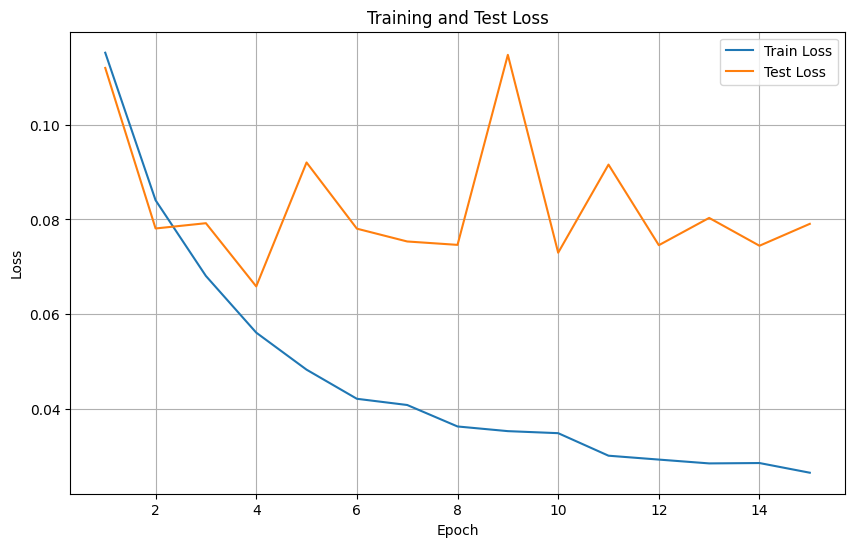

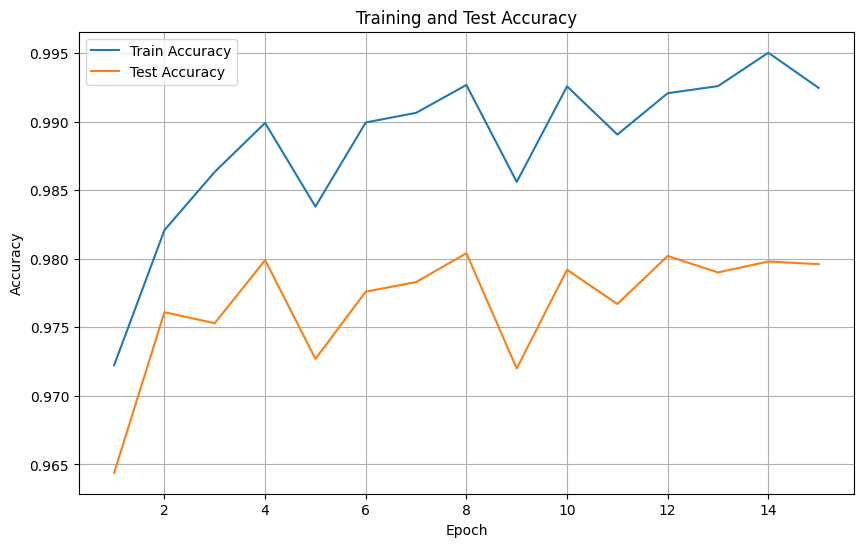

In [96]:
import matplotlib.pyplot as plt

# Plot for Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), history['train_loss'], label='Train Loss')
plt.plot(range(1, num_epochs + 1), history['test_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), history['train_accuracy'], label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), history['test_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Confusion Matrix

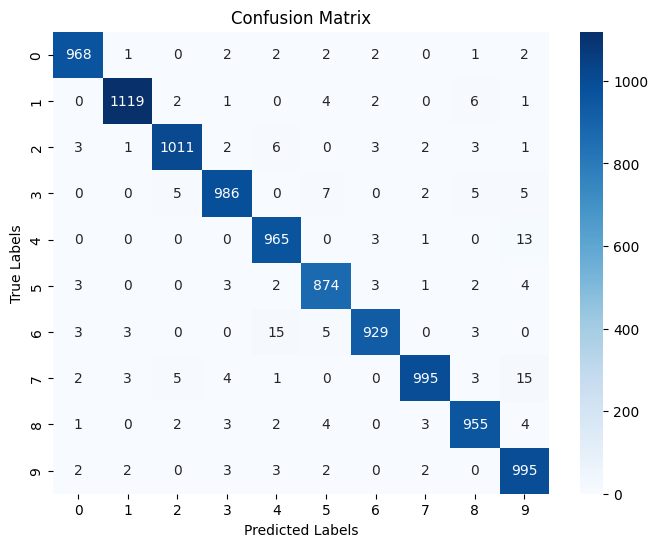

In [97]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to get true labels and predictions from the test set
def get_predictions_and_labels(model, data_loader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)  # Get predicted class labels
            all_preds.extend(preds.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels
            
    return np.array(all_labels), np.array(all_preds)

# Compute confusion matrix
true_labels, predicted_labels = get_predictions_and_labels(best_model, test_loader, device)
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Manual Inspection of incorrect predictions

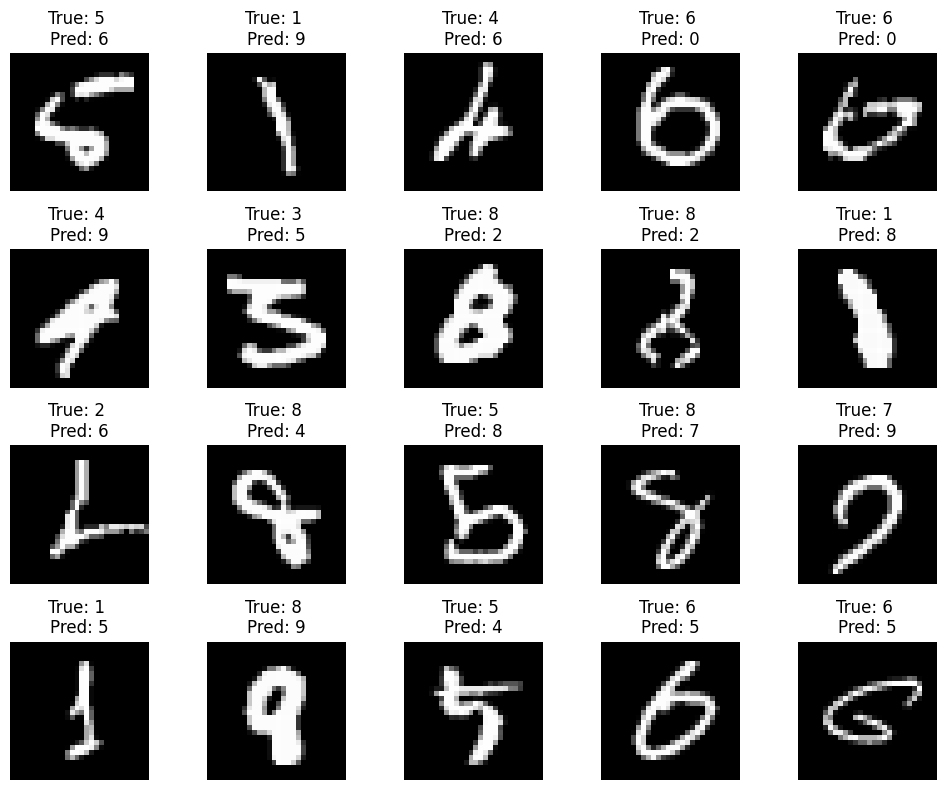

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Function to find incorrect predictions
def get_incorrect_indices(model, data_loader, device):
    model.eval()
    incorrect_indices = []
    incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)

            # Identify incorrect predictions
            mismatches = (preds != labels)
            incorrect_indices.extend(np.where(mismatches.cpu().numpy())[0])
            incorrect_images.extend(images[mismatches].cpu().numpy())
            incorrect_labels.extend(labels[mismatches].cpu().numpy())
            incorrect_preds.extend(preds[mismatches].cpu().numpy())
    
    return incorrect_indices, incorrect_images, incorrect_labels, incorrect_preds

# Get incorrect predictions
incorrect_indices, incorrect_images, incorrect_labels, incorrect_preds = get_incorrect_indices(best_model, test_loader, device)

# Visualize the first 20 incorrect predictions
plt.figure(figsize=(10, 8))
for i in range(min(20, len(incorrect_indices))):
    plt.subplot(4, 5, i + 1)
    plt.imshow(incorrect_images[i].squeeze(), cmap='gray')  # Remove extra dimensions for grayscale
    plt.title(f"True: {incorrect_labels[i]} \nPred: {incorrect_preds[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
